In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns  
import statistics

In [28]:
# using some dummy data for now 
data = [[1,0,1,0,1],[1,1,0,0,1],[1,2,0,0,1],[1,3,0,0,1],
       [2,0,1,0,0],[2,1,0,0,1],[2,2,0,0,0],[2,3,0,0,1],
       [3,0,1,0,0],[3,1,0,0,1],[3,2,0,0,0],[3,3,0,0,1]]
data = pd.DataFrame(data, columns=['hadm_id','hour','ev1','ev2','ev3'])
stringdata, ids = converttostring(data)
stringdata

[[1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]]

In [14]:
data

,hadm_id,hour,ev1,ev2,ev3
0,1,0,1,0,1
1,1,1,0,0,1
2,1,2,0,0,1
3,1,3,0,0,1
4,2,0,1,0,0
5,2,1,0,0,1
6,2,2,0,0,0
7,2,3,0,0,1
8,3,0,1,0,0
9,3,1,0,0,1


In [2]:
def takesample(data, n):
    keep = np.random.choice(list(set(data["hadm_id"])), n, replace=False)
    return data[data["hadm_id"].isin(keep)]

In [3]:
real_traindata = pd.read_csv("data_120_2_train.csv")
real_testdata = pd.read_csv("data_120_2_test.csv")
timegandata = pd.read_csv("timegan_32_50_2000.csv")
deepechodata = pd.read_csv("deepEcho_120_4000epoch.csv")#
ehrmgandata = pd.read_csv("ehrMGAN39.csv")
corgandata = pd.read_csv("corgan2.csv")
ctgandata = pd.read_csv("CTGAN.csv")
doppeldata = pd.read_csv("gendoppel1.csv")
patedata = pd.read_csv("patenew.csv")#

In [10]:
n = len(set(real_testdata["hadm_id"]))
real = takesample(real_traindata,n)

In [4]:
n = len(set(real_testdata["hadm_id"]))
timegan = takesample(timegandata, n)
deepecho = takesample(deepechodata, n)
corgan = takesample(corgandata, n)
ctgan = takesample(ctgandata, n)
doppel = takesample(doppeldata, n)
pate = takesample(patedata, n)
ehrmgan = takesample(ehrmgandata, n)

In [ ]:
# need to have sample sizes equal to test dataset


In [5]:
def converttostring(data):
    # for each hadm make into string 
    ids = list(set(data["hadm_id"]))
    stringdata = []
    for i in ids:
        subset = data[data["hadm_id"]==i]
        subset = subset.drop(["hadm_id","hour"], axis=1)
        stringdata.append(list(subset.to_numpy().flatten()))
    return stringdata, ids

def calcdistance(data):
    distances = []
    for i in range(len(data)):
        print(i,"/",len(data))
        for j in range(i+1, len(data)):
            distances.append(nltk.edit_distance(data[i], data[j]))
    return distances


def calcstats(distances):
    # plots distances and returns the mean, sum and median distances
    plt.hist(distances)
    return pd.Series(distances).describe(), sum(distances), statistics.median(distances)


def levenshteindistance(data):
    stringdata, ids = converttostring(data)
    print("done string conversion")
    distances = calcdistance(stringdata)
    print("done distance calculations")
    lmean, lsum, lmedian = calcstats(distances)
    return distances, lmean, lsum, lmedian

In [6]:
def levenshteinbyfeature(data):
    #columns = list(data.columns)[2:]
    distanceresults = {}
    for c in columns:
        featuredata = data[["hadm_id", "hour",c]]
        stringdata, ids = converttostring(featuredata)
        distances = calcdistance(stringdata)
        lmean, lsum, lmedian = calcstats(distances)
        distanceresults[c] = [lmean, lsum, lmedian]
    return distanceresults

In [6]:
columns=list(real_traindata.columns[2:])

0 / 277
1 / 277
2 / 277
3 / 277
4 / 277
5 / 277
6 / 277
7 / 277
8 / 277
9 / 277
10 / 277
11 / 277
12 / 277
13 / 277
14 / 277
15 / 277
16 / 277
17 / 277
18 / 277
19 / 277
20 / 277
21 / 277
22 / 277
23 / 277
24 / 277
25 / 277
26 / 277
27 / 277
28 / 277
29 / 277
30 / 277
31 / 277
32 / 277
33 / 277
34 / 277
35 / 277
36 / 277
37 / 277
38 / 277
39 / 277
40 / 277
41 / 277
42 / 277
43 / 277
44 / 277
45 / 277
46 / 277
47 / 277
48 / 277
49 / 277
50 / 277
51 / 277
52 / 277
53 / 277
54 / 277
55 / 277
56 / 277
57 / 277
58 / 277
59 / 277
60 / 277
61 / 277
62 / 277
63 / 277
64 / 277
65 / 277
66 / 277
67 / 277
68 / 277
69 / 277
70 / 277
71 / 277
72 / 277
73 / 277
74 / 277
75 / 277
76 / 277
77 / 277
78 / 277
79 / 277
80 / 277
81 / 277
82 / 277
83 / 277
84 / 277
85 / 277
86 / 277
87 / 277
88 / 277
89 / 277
90 / 277
91 / 277
92 / 277
93 / 277
94 / 277
95 / 277
96 / 277
97 / 277
98 / 277
99 / 277
100 / 277
101 / 277
102 / 277
103 / 277
104 / 277
105 / 277
106 / 277
107 / 277
108 / 277
109 / 277
110 / 277


KeyboardInterrupt: 

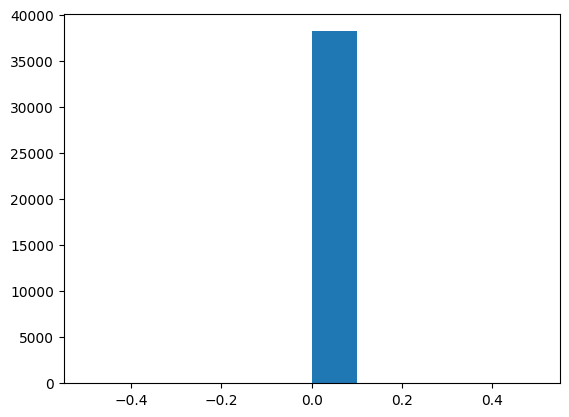

In [10]:
edist = levenshteinbyfeature(ehrmgan)

In [ ]:
pdist = levenshteinbyfeature(pate)

In [ ]:
dodist = levenshteinbyfeature(doppel)

In [ ]:
ctdist = levenshteinbyfeature(ctgan)

In [ ]:
codist = levenshteinbyfeature(corgan)

In [ ]:
ddist = levenshteinbyfeature(deepecho)

In [ ]:
tdist = levenshteinbyfeature(timegan)

In [ ]:
rdist = levenshteinbyfeature(real_testdata)

In [ ]:
ldistances, lmean, lsum, lmedian =levenshteindistance(real_testdata)

In [7]:
# take the mean std for each
def reformat1(data, n):
    values, names, mean, sdv = [],[], 0, 0
    
    for item in data:
        names.append(item)
        mean += data[item][0]["mean"] #data[item][1]
        sdv += data[item][0]["std"]#data[item][2]
        values.append(str(round(data[item][0]["mean"],3))+"$\pm$"+str(round(data[item][0]["std"],3)))
        
    features = pd.DataFrame(values, index =names,columns =[n])
    return features, str(round(mean,3))+"$\pm$"+str(round(sdv,3))

def reformat(lst, names):
    features = pd.DataFrame()
    overall = []
    for i in range(len(lst)):
        f, o = reformat1(lst[i], names[i])
        features = pd.concat([features, f], axis=1)
        overall.append(o)
    #features = features.drop(["hour"], axis=0)
    return features, overall
                        
                    

In [8]:
lst = [rdist, tdist, ddist, edist, codist, ctdist, pdist, dodist]
names = ["REAL", "TIMEGAN","DEEPECHO","EHRMGAN", "CORGAN", "CTGAN", "PATEGAN", "DOPPELGANGER"]

NameError: name 'rdist' is not defined

In [130]:
features, overall = reformat(lst, names)

In [112]:
features

,REAL,TIMEGAN,DEEPECHO,EHRMGAN,CORGAN,CTGAN,PATEGAN,DOPPELGANGER
Blood Products,1.302$\pm$1.791,0.687$\pm$0.778,0.698$\pm$1.102,0.0$\pm$0.0,1.099$\pm$0.981,0.178$\pm$0.477,11.193$\pm$2.27,4.76$\pm$1.255
Electrolytes,10.844$\pm$4.027,11.481$\pm$1.845,10.58$\pm$3.143,1.323$\pm$0.893,12.338$\pm$2.315,8.226$\pm$2.326,5.429$\pm$2.045,9.012$\pm$1.847
Insulin,5.129$\pm$3.191,3.981$\pm$1.614,2.633$\pm$2.006,0.0$\pm$0.0,4.061$\pm$1.785,3.57$\pm$2.0,9.411$\pm$2.214,9.266$\pm$1.878
CBC,9.726$\pm$3.424,10.618$\pm$2.009,9.801$\pm$2.598,1.017$\pm$0.792,11.186$\pm$2.259,7.564$\pm$2.265,2.188$\pm$1.437,8.745$\pm$1.926
Urinalysis,0.714$\pm$0.837,0.0$\pm$0.0,0.531$\pm$0.706,0.0$\pm$0.0,0.783$\pm$0.861,0.043$\pm$0.203,4.889$\pm$1.686,4.738$\pm$1.229
Antibiotics,3.844$\pm$1.916,4.905$\pm$1.698,3.247$\pm$1.588,0.0$\pm$0.0,4.047$\pm$1.889,3.168$\pm$1.191,6.939$\pm$1.909,9.301$\pm$1.998
ABG,8.356$\pm$5.941,6.251$\pm$1.822,6.801$\pm$4.208,0.697$\pm$0.656,9.844$\pm$2.275,4.916$\pm$2.042,7.659$\pm$2.112,8.552$\pm$1.836
Calcium,8.435$\pm$4.312,7.494$\pm$1.701,6.9$\pm$3.028,1.206$\pm$0.828,10.637$\pm$2.228,5.261$\pm$1.812,10.092$\pm$2.438,8.44$\pm$1.889
Glucose,10.291$\pm$4.502,9.278$\pm$1.821,9.677$\pm$3.444,0.845$\pm$0.73,10.749$\pm$2.407,7.591$\pm$2.298,2.165$\pm$1.323,8.65$\pm$1.945


In [116]:
features.to_csv("levenshteindist.csv")

In [131]:
overall

['58.642$\\pm$29.939',
 '54.695$\\pm$13.288',
 '50.869$\\pm$21.822',
 '5.088$\\pm$3.899',
 '64.745$\\pm$17.0',
 '40.518$\\pm$14.614',
 '59.963$\\pm$17.434',
 '71.465$\\pm$15.802']

In [ ]:
# print mean and stv or total 

#reformat
lst = [realstats, timeganstats, deepechostats,ehrmganstats, corganstats, ctganstats, patestats, doppelstats]
names = ["REAL", "TIMEGAN","DEEPECHO","EHRMGAN", "CORGAN", "CTGAN", "PATEGAN", "DOPPELGANGER"]
i = 0
df = pd.DataFrame()
for item in lst:
    item = item.round(3)
    item[names[i]] = item["MEAN"].astype(str) + "$\pm$"+item["STD"].astype(str)
    df = pd.concat([df, item[names[i]]], axis=1)
    i += 1

done string conversion
0 / 277
1 / 277
2 / 277
3 / 277
4 / 277
5 / 277
6 / 277
7 / 277
8 / 277
9 / 277
10 / 277
11 / 277
12 / 277
13 / 277
14 / 277
15 / 277
16 / 277
17 / 277
18 / 277
19 / 277
20 / 277
21 / 277
22 / 277
23 / 277
24 / 277
25 / 277
26 / 277
27 / 277
28 / 277
29 / 277
30 / 277
31 / 277
32 / 277
33 / 277
34 / 277
35 / 277
36 / 277
37 / 277
38 / 277
39 / 277
40 / 277
41 / 277
42 / 277
43 / 277
44 / 277
45 / 277
46 / 277
47 / 277
48 / 277
49 / 277
50 / 277
51 / 277
52 / 277
53 / 277
54 / 277
55 / 277
56 / 277
57 / 277
58 / 277
59 / 277
60 / 277
61 / 277
62 / 277
63 / 277
64 / 277
65 / 277
66 / 277
67 / 277
68 / 277
69 / 277
70 / 277
71 / 277
72 / 277
73 / 277
74 / 277
75 / 277
76 / 277
77 / 277
78 / 277
79 / 277
80 / 277
81 / 277
82 / 277
83 / 277
84 / 277
85 / 277
86 / 277
87 / 277
88 / 277
89 / 277
90 / 277
91 / 277
92 / 277
93 / 277
94 / 277
95 / 277
96 / 277
97 / 277
98 / 277
99 / 277
100 / 277
101 / 277
102 / 277
103 / 277
104 / 277
105 / 277
106 / 277
107 / 277
108 / 2

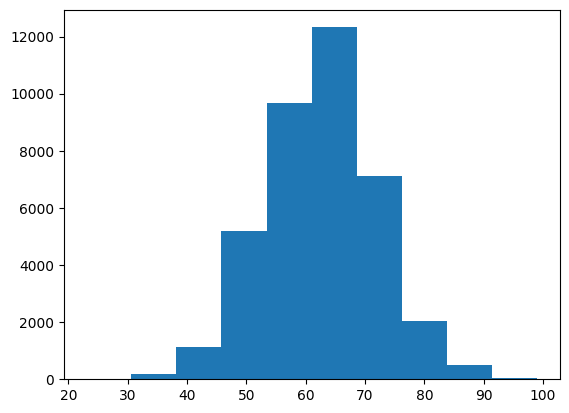

In [9]:
timedistances, timemean, timesum, timemedian =levenshteindistance(timegan)

In [11]:
timedistances

[42,
 55,
 56,
 68,
 57,
 67,
 79,
 77,
 62,
 49,
 59,
 56,
 44,
 56,
 54,
 56,
 72,
 59,
 73,
 60,
 63,
 53,
 66,
 52,
 52,
 52,
 71,
 56,
 71,
 63,
 79,
 59,
 61,
 64,
 50,
 53,
 47,
 76,
 44,
 66,
 56,
 59,
 63,
 59,
 50,
 61,
 62,
 57,
 64,
 54,
 65,
 73,
 52,
 57,
 56,
 53,
 58,
 64,
 79,
 60,
 57,
 60,
 62,
 58,
 49,
 63,
 60,
 50,
 54,
 56,
 63,
 66,
 61,
 58,
 74,
 61,
 48,
 49,
 64,
 46,
 66,
 56,
 73,
 58,
 70,
 52,
 58,
 56,
 61,
 61,
 76,
 61,
 64,
 73,
 58,
 64,
 52,
 67,
 62,
 68,
 50,
 65,
 41,
 51,
 44,
 54,
 47,
 61,
 53,
 54,
 58,
 61,
 58,
 56,
 69,
 68,
 62,
 70,
 63,
 57,
 54,
 76,
 56,
 50,
 63,
 66,
 61,
 59,
 47,
 59,
 59,
 55,
 52,
 58,
 58,
 72,
 83,
 59,
 64,
 57,
 52,
 55,
 48,
 56,
 59,
 51,
 66,
 61,
 65,
 55,
 58,
 73,
 56,
 67,
 62,
 70,
 57,
 61,
 59,
 70,
 63,
 67,
 52,
 54,
 54,
 60,
 78,
 57,
 60,
 65,
 68,
 56,
 50,
 48,
 52,
 55,
 64,
 57,
 54,
 66,
 54,
 55,
 65,
 61,
 70,
 49,
 50,
 71,
 56,
 74,
 46,
 59,
 62,
 58,
 60,
 66,
 54,
 71,
 64,
 67,


done string conversion
0 / 277
1 / 277
2 / 277
3 / 277
4 / 277
5 / 277
6 / 277
7 / 277
8 / 277
9 / 277
10 / 277
11 / 277
12 / 277
13 / 277
14 / 277
15 / 277
16 / 277
17 / 277
18 / 277
19 / 277
20 / 277
21 / 277
22 / 277
23 / 277
24 / 277
25 / 277
26 / 277
27 / 277
28 / 277
29 / 277
30 / 277
31 / 277
32 / 277
33 / 277
34 / 277
35 / 277
36 / 277
37 / 277
38 / 277
39 / 277
40 / 277
41 / 277
42 / 277
43 / 277
44 / 277
45 / 277
46 / 277
47 / 277
48 / 277
49 / 277
50 / 277
51 / 277
52 / 277
53 / 277
54 / 277
55 / 277
56 / 277
57 / 277
58 / 277
59 / 277
60 / 277
61 / 277
62 / 277
63 / 277
64 / 277
65 / 277
66 / 277
67 / 277
68 / 277
69 / 277
70 / 277
71 / 277
72 / 277
73 / 277
74 / 277
75 / 277
76 / 277
77 / 277
78 / 277
79 / 277
80 / 277
81 / 277
82 / 277
83 / 277
84 / 277
85 / 277
86 / 277
87 / 277
88 / 277
89 / 277
90 / 277
91 / 277
92 / 277
93 / 277
94 / 277
95 / 277
96 / 277
97 / 277
98 / 277
99 / 277
100 / 277
101 / 277
102 / 277
103 / 277
104 / 277
105 / 277
106 / 277
107 / 277
108 / 2

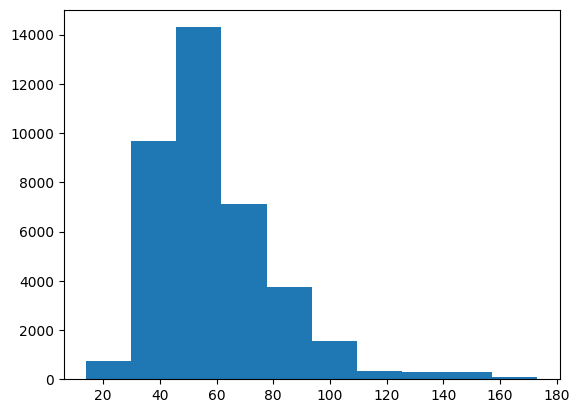

In [12]:
realdistances, realmean, realsum, realmedian =levenshteindistance(real)

In [17]:
temp = []
for entry in realdistances:
    temp.append([entry, "REAL"])
temp1 = []
for entry in timedistances:
    temp1.append([entry, "TIMEGAN"])

In [44]:
def plotdata(distances, label):
    temp = []
    for entry in realdistances:
        temp.append([entry, "REAL"])
    temp1 = []
    for entry in distances:
        temp1.append([entry, label])
    df = pd.DataFrame(temp, columns=["Distance", "Label"])
    df1 = pd.DataFrame(temp1, columns=["Distance", "Label"])
    #creating subplots
    ax=plt.subplots()

    #plotting columns
    ax=sns.countplot(x='Distance', data=df1,color = 'red', alpha=1, label=label)
    ax=sns.countplot(x='Distance', data=df,color = 'blue',alpha=0.5, label="REAL")


    #renaming the axes
    #ax.set(xlabel="x-axis", ylabel="y-axis")
    # Adjusting the x-axis ticks
    new_ticks = [i.get_text() for i in ax.get_xticklabels()]
    plt.xticks(range(0, len(new_ticks), 10), new_ticks[::10])
    ax.legend()
    # visualizing illustration
    plt.show()


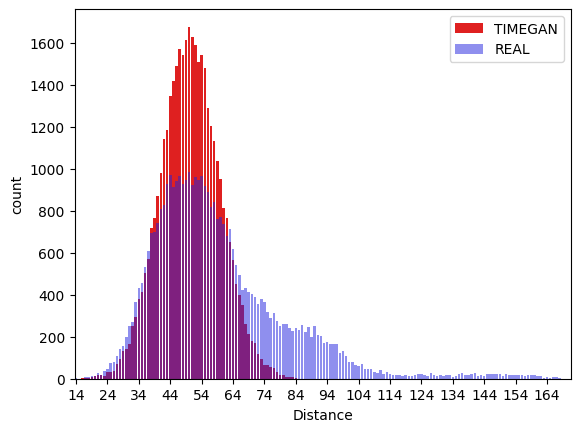

In [36]:
plotdata(timedistances, "TIMEGAN")

NameError: name 'deepdistances' is not defined

done string conversion
0 / 277
1 / 277
2 / 277
3 / 277
4 / 277
5 / 277
6 / 277
7 / 277
8 / 277
9 / 277
10 / 277
11 / 277
12 / 277
13 / 277
14 / 277
15 / 277
16 / 277
17 / 277
18 / 277
19 / 277
20 / 277
21 / 277
22 / 277
23 / 277
24 / 277
25 / 277
26 / 277
27 / 277
28 / 277
29 / 277
30 / 277
31 / 277
32 / 277
33 / 277
34 / 277
35 / 277
36 / 277
37 / 277
38 / 277
39 / 277
40 / 277
41 / 277
42 / 277
43 / 277
44 / 277
45 / 277
46 / 277
47 / 277
48 / 277
49 / 277
50 / 277
51 / 277
52 / 277
53 / 277
54 / 277
55 / 277
56 / 277
57 / 277
58 / 277
59 / 277
60 / 277
61 / 277
62 / 277
63 / 277
64 / 277
65 / 277
66 / 277
67 / 277
68 / 277
69 / 277
70 / 277
71 / 277
72 / 277
73 / 277
74 / 277
75 / 277
76 / 277
77 / 277
78 / 277
79 / 277
80 / 277
81 / 277
82 / 277
83 / 277
84 / 277
85 / 277
86 / 277
87 / 277
88 / 277
89 / 277
90 / 277
91 / 277
92 / 277
93 / 277
94 / 277
95 / 277
96 / 277
97 / 277
98 / 277
99 / 277
100 / 277
101 / 277
102 / 277
103 / 277
104 / 277
105 / 277
106 / 277
107 / 277
108 / 2

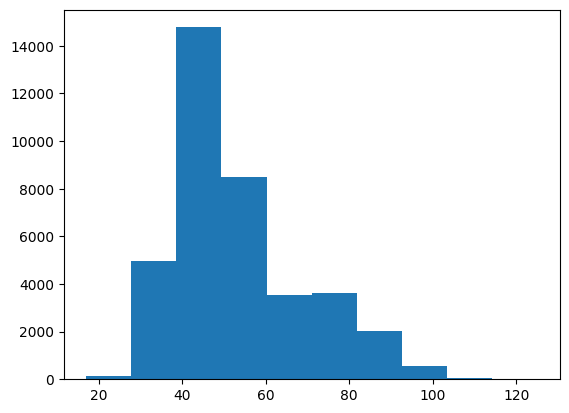

In [38]:
deepdistances, deepmean, deepsum, deepmedian =levenshteindistance(deepecho)

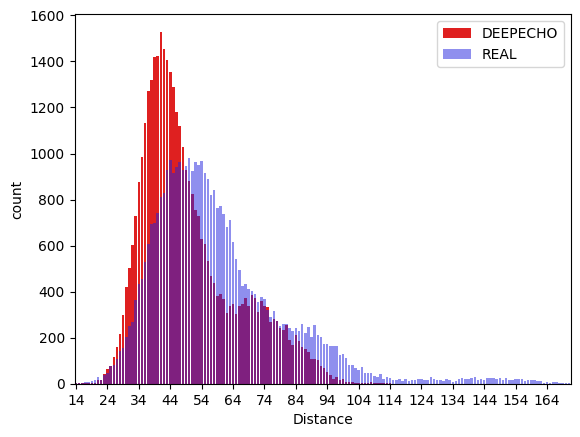

In [45]:
plotdata(deepdistances, "DEEPECHO")

done string conversion
0 / 277
1 / 277
2 / 277
3 / 277
4 / 277
5 / 277
6 / 277
7 / 277
8 / 277
9 / 277
10 / 277
11 / 277
12 / 277
13 / 277
14 / 277
15 / 277
16 / 277
17 / 277
18 / 277
19 / 277
20 / 277
21 / 277
22 / 277
23 / 277
24 / 277
25 / 277
26 / 277
27 / 277
28 / 277
29 / 277
30 / 277
31 / 277
32 / 277
33 / 277
34 / 277
35 / 277
36 / 277
37 / 277
38 / 277
39 / 277
40 / 277
41 / 277
42 / 277
43 / 277
44 / 277
45 / 277
46 / 277
47 / 277
48 / 277
49 / 277
50 / 277
51 / 277
52 / 277
53 / 277
54 / 277
55 / 277
56 / 277
57 / 277
58 / 277
59 / 277
60 / 277
61 / 277
62 / 277
63 / 277
64 / 277
65 / 277
66 / 277
67 / 277
68 / 277
69 / 277
70 / 277
71 / 277
72 / 277
73 / 277
74 / 277
75 / 277
76 / 277
77 / 277
78 / 277
79 / 277
80 / 277
81 / 277
82 / 277
83 / 277
84 / 277
85 / 277
86 / 277
87 / 277
88 / 277
89 / 277
90 / 277
91 / 277
92 / 277
93 / 277
94 / 277
95 / 277
96 / 277
97 / 277
98 / 277
99 / 277
100 / 277
101 / 277
102 / 277
103 / 277
104 / 277
105 / 277
106 / 277
107 / 277
108 / 2

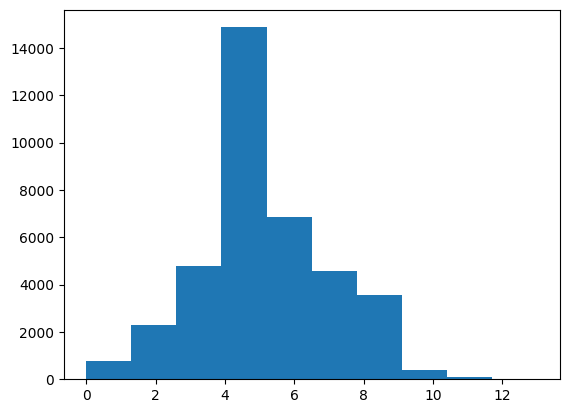

In [40]:
ehrdistances, ehrmean, ehrsum, ehrmedian =levenshteindistance(ehrmgan)

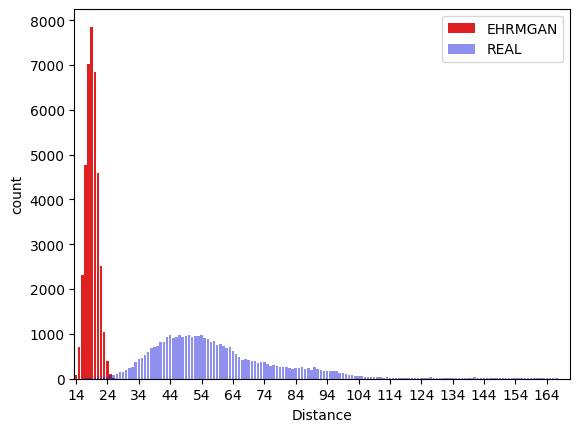

In [46]:
plotdata(ehrdistances, "EHRMGAN")

done string conversion
0 / 277
1 / 277
2 / 277
3 / 277
4 / 277
5 / 277
6 / 277
7 / 277
8 / 277
9 / 277
10 / 277
11 / 277
12 / 277
13 / 277
14 / 277
15 / 277
16 / 277
17 / 277
18 / 277
19 / 277
20 / 277
21 / 277
22 / 277
23 / 277
24 / 277
25 / 277
26 / 277
27 / 277
28 / 277
29 / 277
30 / 277
31 / 277
32 / 277
33 / 277
34 / 277
35 / 277
36 / 277
37 / 277
38 / 277
39 / 277
40 / 277
41 / 277
42 / 277
43 / 277
44 / 277
45 / 277
46 / 277
47 / 277
48 / 277
49 / 277
50 / 277
51 / 277
52 / 277
53 / 277
54 / 277
55 / 277
56 / 277
57 / 277
58 / 277
59 / 277
60 / 277
61 / 277
62 / 277
63 / 277
64 / 277
65 / 277
66 / 277
67 / 277
68 / 277
69 / 277
70 / 277
71 / 277
72 / 277
73 / 277
74 / 277
75 / 277
76 / 277
77 / 277
78 / 277
79 / 277
80 / 277
81 / 277
82 / 277
83 / 277
84 / 277
85 / 277
86 / 277
87 / 277
88 / 277
89 / 277
90 / 277
91 / 277
92 / 277
93 / 277
94 / 277
95 / 277
96 / 277
97 / 277
98 / 277
99 / 277
100 / 277
101 / 277
102 / 277
103 / 277
104 / 277
105 / 277
106 / 277
107 / 277
108 / 2

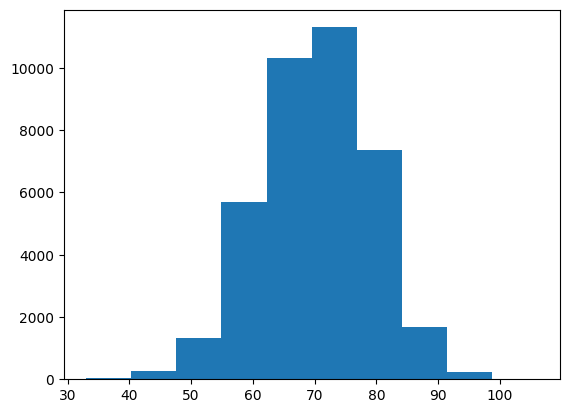

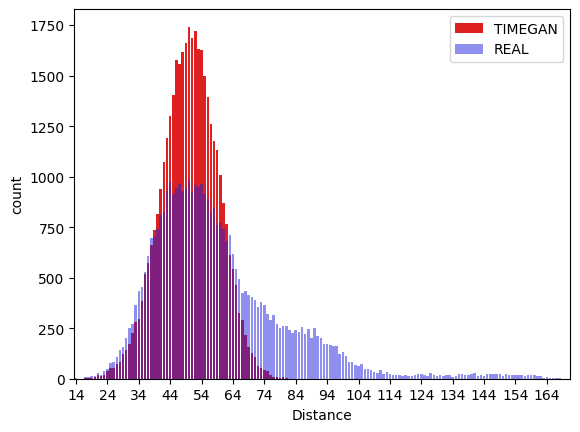

In [42]:
doppeldistances, doppelmean, doppelsum, patemedian =levenshteindistance(doppel)
plotdata(doppeldistances, "DOPPELGANGER")
#ctgandistances, ctganmean, ctgansum, ctganmedian =levenshteindistance(ctgan)
#corgandistances, corganmean, corgansum, corganmedian =levenshteindistance(corgan)
#ehrdistances, ehrmean, ehrsum, ehrmedian =levenshteindistance(ehrmgan)

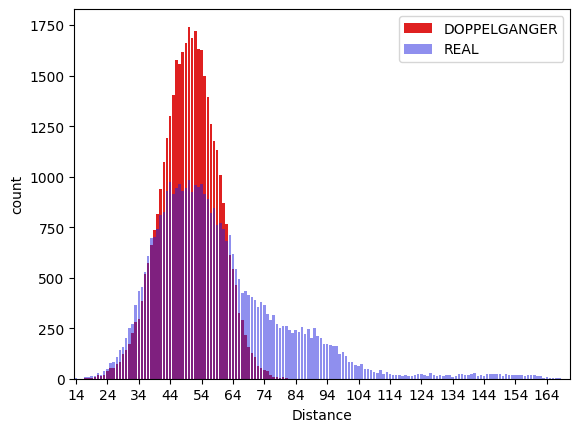

In [47]:
plotdata(doppeldistances, "DOPPELGANGER")

done string conversion
0 / 277
1 / 277
2 / 277
3 / 277
4 / 277
5 / 277
6 / 277
7 / 277
8 / 277
9 / 277
10 / 277
11 / 277
12 / 277
13 / 277
14 / 277
15 / 277
16 / 277
17 / 277
18 / 277
19 / 277
20 / 277
21 / 277
22 / 277
23 / 277
24 / 277
25 / 277
26 / 277
27 / 277
28 / 277
29 / 277
30 / 277
31 / 277
32 / 277
33 / 277
34 / 277
35 / 277
36 / 277
37 / 277
38 / 277
39 / 277
40 / 277
41 / 277
42 / 277
43 / 277
44 / 277
45 / 277
46 / 277
47 / 277
48 / 277
49 / 277
50 / 277
51 / 277
52 / 277
53 / 277
54 / 277
55 / 277
56 / 277
57 / 277
58 / 277
59 / 277
60 / 277
61 / 277
62 / 277
63 / 277
64 / 277
65 / 277
66 / 277
67 / 277
68 / 277
69 / 277
70 / 277
71 / 277
72 / 277
73 / 277
74 / 277
75 / 277
76 / 277
77 / 277
78 / 277
79 / 277
80 / 277
81 / 277
82 / 277
83 / 277
84 / 277
85 / 277
86 / 277
87 / 277
88 / 277
89 / 277
90 / 277
91 / 277
92 / 277
93 / 277
94 / 277
95 / 277
96 / 277
97 / 277
98 / 277
99 / 277
100 / 277
101 / 277
102 / 277
103 / 277
104 / 277
105 / 277
106 / 277
107 / 277
108 / 2

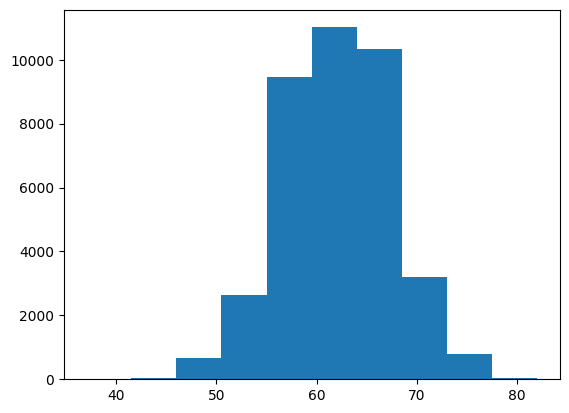

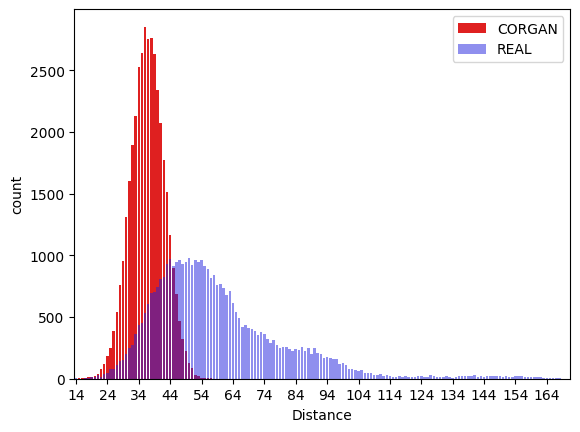

In [48]:
corgandistances, corganmean, corgansum, corganmedian =levenshteindistance(corgan)
plotdata(corgandistances, "CORGAN")

done string conversion
0 / 277
1 / 277
2 / 277
3 / 277
4 / 277
5 / 277
6 / 277
7 / 277
8 / 277
9 / 277
10 / 277
11 / 277
12 / 277
13 / 277
14 / 277
15 / 277
16 / 277
17 / 277
18 / 277
19 / 277
20 / 277
21 / 277
22 / 277
23 / 277
24 / 277
25 / 277
26 / 277
27 / 277
28 / 277
29 / 277
30 / 277
31 / 277
32 / 277
33 / 277
34 / 277
35 / 277
36 / 277
37 / 277
38 / 277
39 / 277
40 / 277
41 / 277
42 / 277
43 / 277
44 / 277
45 / 277
46 / 277
47 / 277
48 / 277
49 / 277
50 / 277
51 / 277
52 / 277
53 / 277
54 / 277
55 / 277
56 / 277
57 / 277
58 / 277
59 / 277
60 / 277
61 / 277
62 / 277
63 / 277
64 / 277
65 / 277
66 / 277
67 / 277
68 / 277
69 / 277
70 / 277
71 / 277
72 / 277
73 / 277
74 / 277
75 / 277
76 / 277
77 / 277
78 / 277
79 / 277
80 / 277
81 / 277
82 / 277
83 / 277
84 / 277
85 / 277
86 / 277
87 / 277
88 / 277
89 / 277
90 / 277
91 / 277
92 / 277
93 / 277
94 / 277
95 / 277
96 / 277
97 / 277
98 / 277
99 / 277
100 / 277
101 / 277
102 / 277
103 / 277
104 / 277
105 / 277
106 / 277
107 / 277
108 / 2

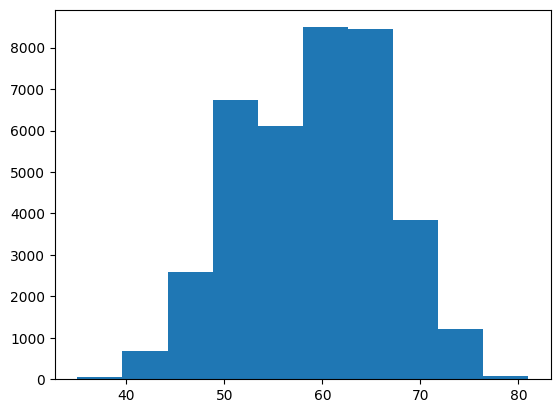

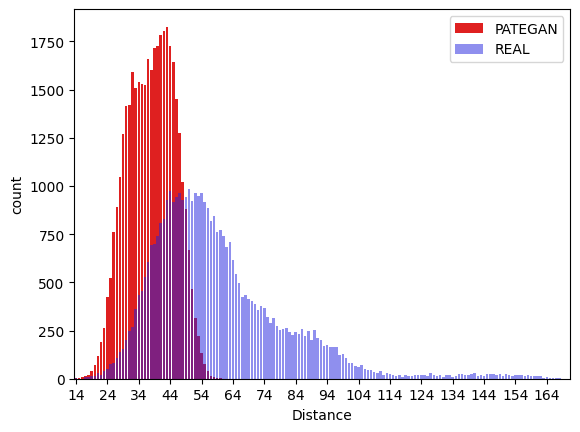

In [49]:
patedistances, patemean, patesum, patemedian =levenshteindistance(pate)
plotdata(patedistances, "PATEGAN")

In [ ]:
import seaborn as sns

In [ ]:
#creating subplots
ax=plt.subplots()
 
#plotting columns
ax=sns.barplot(x=df["X"],y=df["Y"],color = 'lime')
ax=sns.barplot(x=df["X"],y=df["Z"],color = 'green')
 
#renaming the axes
ax.set(xlabel="x-axis", ylabel="y-axis")
 
# visualizing illustration
plt.show()

In [ ]:
#should show them overlapping

In [7]:
from pyclustering.cluster.birch import birch;
from pyclustering.utils import read_sample;

In [8]:
# load data from the FCPS set that is provided by the library.
sample = read_sample(FCPS_SAMPLES.SAMPLE_LSUN);
# create BIRCH algorithm for allocation three objects.
birch_instance = birch(sample, 3);
# start processing - cluster analysis of the input data.
birch_instance.process();
# allocate clusters.
clusters = birch_instance.get_clusters();
# visualize obtained clusters.
visualizer = cluster_visualizer();
visualizer.append_clusters(clusters, sample);
visualizer.show();

NameError: name 'FCPS_SAMPLES' is not defined

In [9]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

In [ ]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.025})

In [12]:
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [23]:
import sklearn.cluster as cluster
import time

In [24]:
plot_clusters(stringdata, cluster.DBSCAN, (), {'eps':0.025})

AttributeError: 'list' object has no attribute 'T'

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import editdistance


In [30]:
stringdata

[[1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]]

/var/folders/1j/_vv7n2wd6j11jfd9ybmtpnz80000gn/T/ipykernel_65426/1847388147.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(edit_distances, method='single')


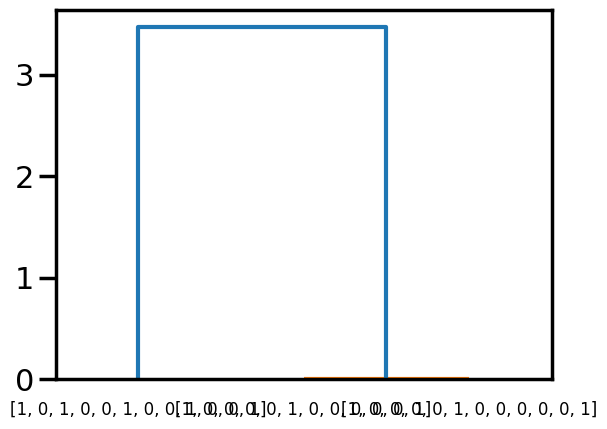

In [29]:


# Example clustering using edit distances
data = stringdata
edit_distances = [[editdistance.eval(a, b) for b in data] for a in data]

# Perform hierarchical clustering
linkage_matrix = linkage(edit_distances, method='single')

# Visualize the clustering as a dendrogram
dendrogram(linkage_matrix, labels=data)
plt.show()